===================

## Credit Scoring

Tanggal 28 Agustus 2018

Analisis Data

=================

In [3]:
# import librari
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import kedua
# import library
from random import sample
from  xgboost import  XGBClassifier
import seaborn as sn
import numpy as np
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier,BaggingClassifier,RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# display semua
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# import data
train=pd.read_csv('npl_train.csv')
test=pd.read_csv('npl_test.csv')

In [85]:
# menampilakan data semua
train.head(4)

,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,flag_kredit_macet
0,102.19,0.0,74.78,100.00,0,15.416667,94.0,0
1,0.00,0.0,0.00,0.00,0,0.750000,1012.0,0
2,100.00,0.0,100.00,100.91,0,10.750000,0.0,0
3,100.00,0.0,25.01,22.64,0,19.750000,2536660.0,0


In [7]:
train.columns

Index(['X', 'jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan',
       'total_pemakaian_tunai', 'total_pemakaian_retail',
       'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi', 'flag_kredit_macet',
       'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
       'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan'],
      dtype='object')

## Data Ku

In [9]:
# data yang akan saya analisis
train=train[['rasio_pembayaran','persentasi_overlimit', 'rasio_pembayaran_3bulan','rasio_pembayaran_6bulan', 'skor_delikuensi','jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian','flag_kredit_macet']]

In [10]:
# summary data
train.describe()

,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,flag_kredit_macet
count,15493.00000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,1.549300e+04,15493.000000
mean,64.64712,3.343533,50.530351,81.666238,0.004776,6.634093,2.100421e+06,0.087717
std,794.16940,9.241921,1327.275247,1467.822452,0.114088,4.675454,8.092612e+06,0.282892
min,-18138.00000,0.000000,-57792.340000,-77056.000000,0.000000,0.750000,-1.566720e+07,0.000000
25%,0.00000,0.000000,20.200000,21.600000,0.000000,2.920000,0.000000e+00,0.000000
50%,27.00000,0.000000,50.000000,65.600000,0.000000,5.666667,2.480000e+05,0.000000
75%,100.00000,1.060000,91.370000,100.000000,0.000000,9.330000,1.512235e+06,0.000000
max,68983.00000,190.000000,75575.000000,54899.000000,5.000000,34.416667,3.140000e+08,1.000000


In [12]:
# ukuran data train
train.shape

(15493, 8)

Variabel Target

In [13]:
# banyaknya target
train.flag_kredit_macet.value_counts()

0    14134
1     1359
Name: flag_kredit_macet, dtype: int64

In [14]:
# proporsi target
train.flag_kredit_macet.value_counts(normalize=True)

0    0.912283
1    0.087717
Name: flag_kredit_macet, dtype: float64

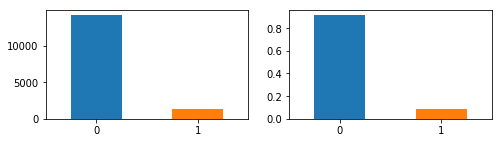

In [15]:
# visualisasi banyak target
plt.figure(figsize=(8,2))
plt.subplot(121)
train.flag_kredit_macet.value_counts().plot.bar(rot=0)
plt.subplot(122)
train.flag_kredit_macet.value_counts(normalize=True).plot.bar(rot=0)

Missing value

In [16]:
# missing
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [17]:
missing_data(train)

,Total,Percent
flag_kredit_macet,0,0.0
total_pemakaian,0,0.0
jumlah_tahun_sejak_pembukaan_kredit,0,0.0
skor_delikuensi,0,0.0
rasio_pembayaran_6bulan,0,0.0
rasio_pembayaran_3bulan,0,0.0
persentasi_overlimit,0,0.0
rasio_pembayaran,0,0.0


In [18]:
train.head()

,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,flag_kredit_macet
0,102.19,0.0,74.78,100.00,0,15.416667,94.0,0
1,0.00,0.0,0.00,0.00,0,0.750000,1012.0,0
2,100.00,0.0,100.00,100.91,0,10.750000,0.0,0
3,100.00,0.0,25.01,22.64,0,19.750000,2536660.0,0
4,95.99,0.0,97.49,99.84,0,1.666667,2666558.0,0


## Analisis Awal

rasio_pembayaran

C:\Users\nurcha059384\AppData\Local\Continuum\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'rasio_pembayaran')

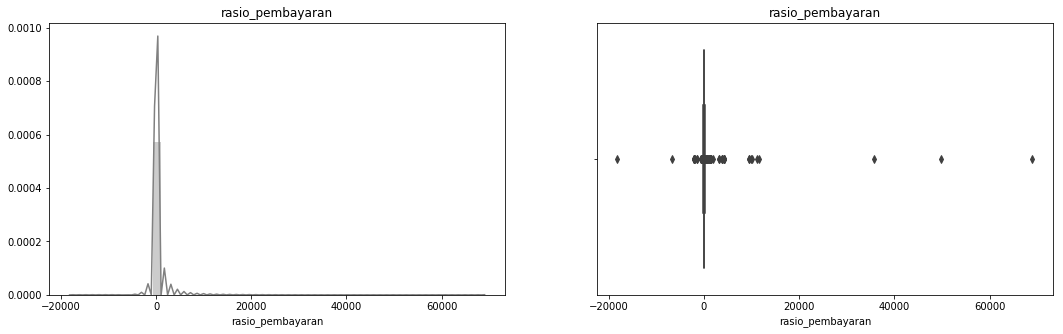

In [19]:
# Distribusi data
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.distplot(train['rasio_pembayaran'], kde=True, color = 'grey' )
plt.title('rasio_pembayaran')

# Cek Outlier
plt.subplot(122)
sns.boxplot(x='rasio_pembayaran',data=train)
plt.title('rasio_pembayaran')

persentasi_overlimit

C:\Users\nurcha059384\AppData\Local\Continuum\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'persentasi_overlimit')

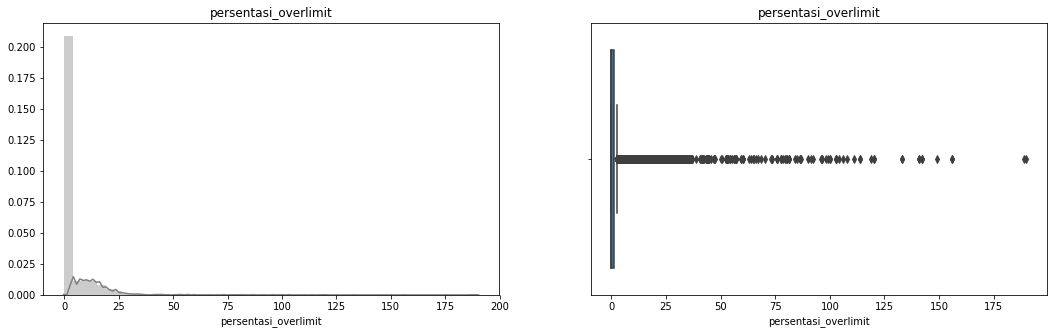

In [21]:
# Distribusi data
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.distplot(train['persentasi_overlimit'], kde=True, color = 'grey' )
plt.title('persentasi_overlimit')

# Cek Outlier
plt.subplot(122)
sns.boxplot(x='persentasi_overlimit',data=train)
plt.title('persentasi_overlimit')

rasio_pembayaran_3bulan

C:\Users\nurcha059384\AppData\Local\Continuum\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'rasio_pembayaran_3bulan')

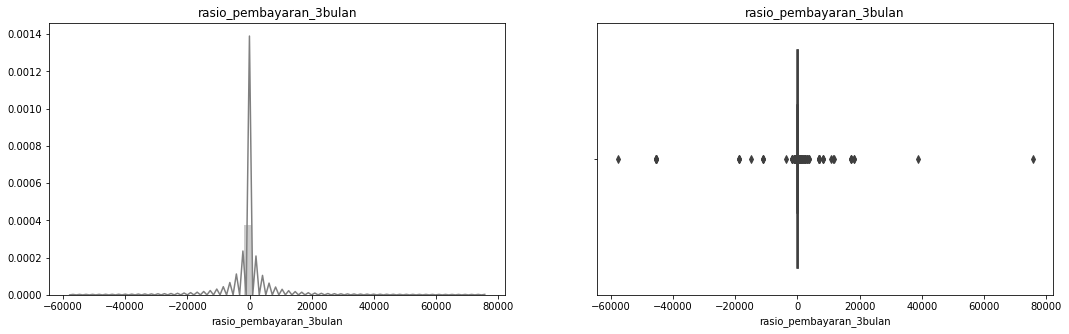

In [24]:
# Distribusi data
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.distplot(train['rasio_pembayaran_3bulan'], kde=True, color = 'grey' )
plt.title('rasio_pembayaran_3bulan')

# Cek Outlier
plt.subplot(122)
sns.boxplot(x='rasio_pembayaran_3bulan',data=train)
plt.title('rasio_pembayaran_3bulan')

rasio_pembayaran_6bulan

C:\Users\nurcha059384\AppData\Local\Continuum\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'rasio_pembayaran_6bulan')

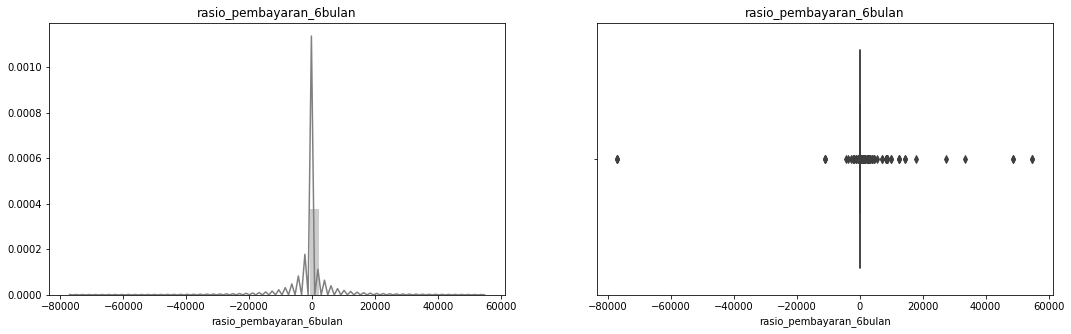

In [25]:
# Distribusi data
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.distplot(train['rasio_pembayaran_6bulan'], kde=True, color = 'grey' )
plt.title('rasio_pembayaran_6bulan')

# Cek Outlier
plt.subplot(122)
sns.boxplot(x='rasio_pembayaran_6bulan',data=train)
plt.title('rasio_pembayaran_6bulan')

skor_delikuensi

In [47]:
train.skor_delikuensi.value_counts()

0    15451
1       29
4        4
2        4
5        3
3        2
Name: skor_delikuensi, dtype: int64

C:\Users\nurcha059384\AppData\Local\Continuum\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'skor_delikuensi')

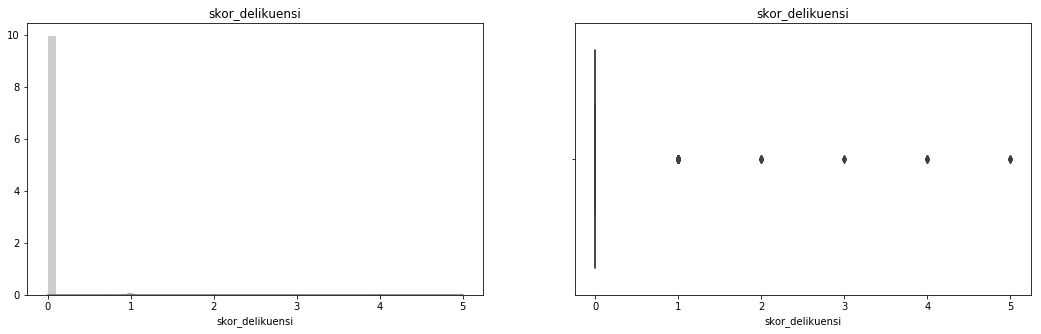

In [26]:
# Distribusi data
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.distplot(train['skor_delikuensi'], kde=True, color = 'grey' )
plt.title('skor_delikuensi')

# Cek Outlier
plt.subplot(122)
sns.boxplot(x='skor_delikuensi',data=train)
plt.title('skor_delikuensi')

jumlah_tahun_sejak_pembukaan_kredit

C:\Users\nurcha059384\AppData\Local\Continuum\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'jumlah_tahun_sejak_pembukaan_kredit')

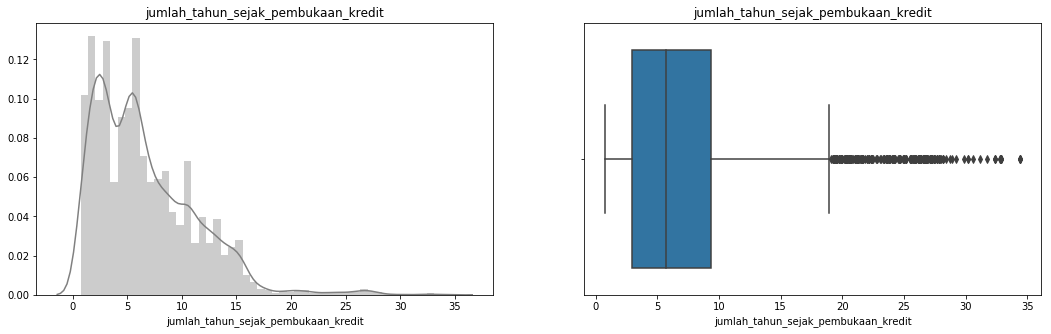

In [27]:
# Distribusi data
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.distplot(train['jumlah_tahun_sejak_pembukaan_kredit'], kde=True, color = 'grey' )
plt.title('jumlah_tahun_sejak_pembukaan_kredit')

# Cek Outlier
plt.subplot(122)
sns.boxplot(x='jumlah_tahun_sejak_pembukaan_kredit',data=train)
plt.title('jumlah_tahun_sejak_pembukaan_kredit')

total_pemakain == Total pemakaian kartu kredit (tunai dan retail) pada bulan terakhir

C:\Users\nurcha059384\AppData\Local\Continuum\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Total Pemakaian')

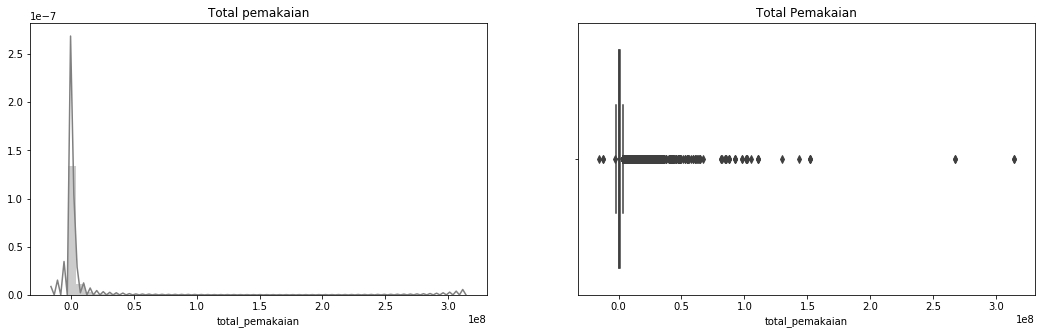

In [21]:
# Distribusi data
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.distplot(train['total_pemakaian'], kde=True, color = 'grey' )
plt.title('Total pemakaian')

# Cek Outlier
plt.subplot(122)
sns.boxplot(x='total_pemakaian',data=train)
plt.title('Total Pemakaian')

## Target vs Prediktor

Prediktor

In [28]:
train.head()

,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,flag_kredit_macet
0,102.19,0.0,74.78,100.00,0,15.416667,94.0,0
1,0.00,0.0,0.00,0.00,0,0.750000,1012.0,0
2,100.00,0.0,100.00,100.91,0,10.750000,0.0,0
3,100.00,0.0,25.01,22.64,0,19.750000,2536660.0,0
4,95.99,0.0,97.49,99.84,0,1.666667,2666558.0,0


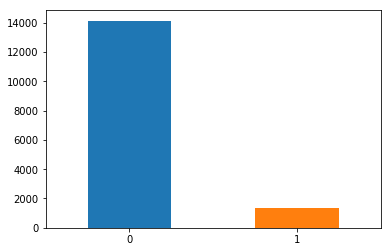

In [44]:
train.flag_kredit_macet.value_counts().plot.bar(rot=0)

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: rasio_pembayaran, dtype: object

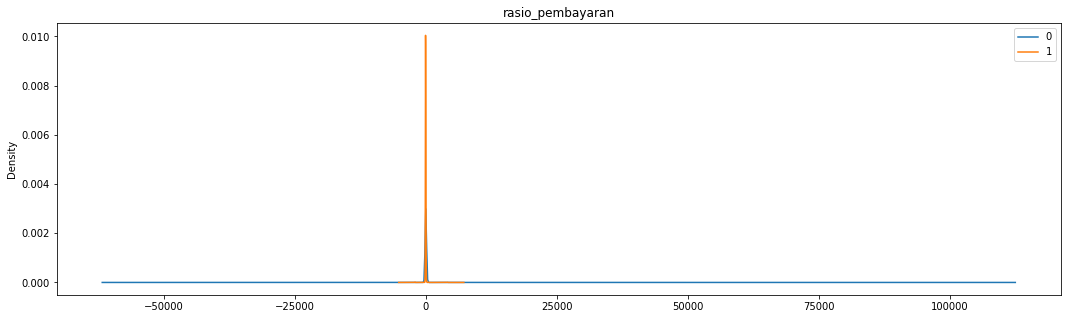

In [78]:
# rasio_pembayaran
plt.figure(figsize=(18,5))
train.groupby('flag_kredit_macet').rasio_pembayaran.plot.density(title='rasio_pembayaran',legend=True)

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: persentasi_overlimit, dtype: object

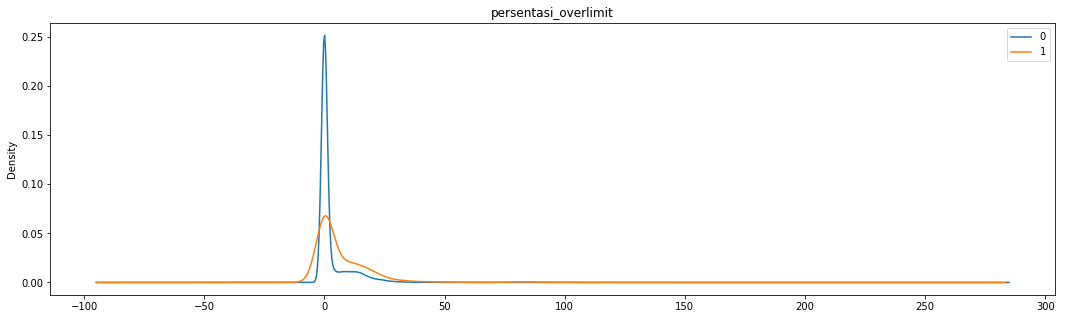

In [70]:
# persentasi_overlimit
plt.figure(figsize=(18,5))
train.groupby('flag_kredit_macet').persentasi_overlimit.plot.density(title='persentasi_overlimit',legend=True)

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: rasio_pembayaran_3bulan, dtype: object

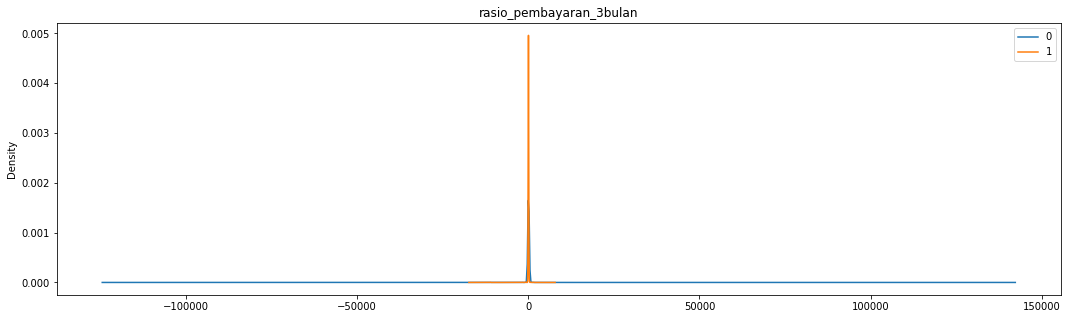

In [71]:
# rasio_pembayaran_3bulan
plt.figure(figsize=(18,5))
train.groupby('flag_kredit_macet').rasio_pembayaran_3bulan.plot.density(title='rasio_pembayaran_3bulan',legend=True)

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: rasio_pembayaran_6bulan, dtype: object

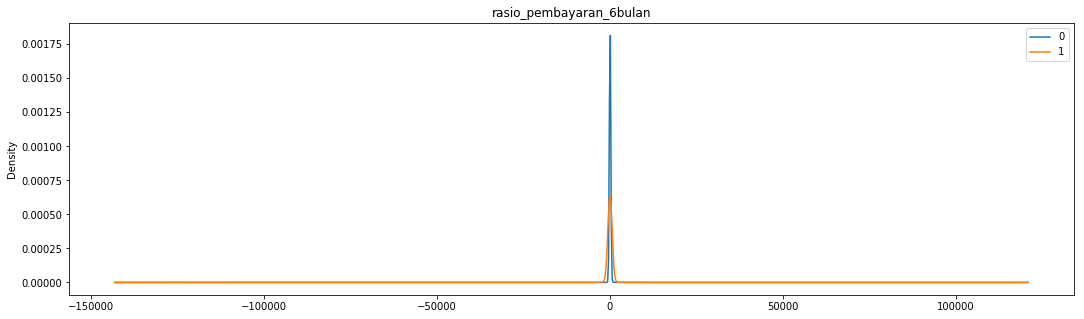

In [74]:
# rasio_pembayaran_6bulan
plt.figure(figsize=(18,5))
train.groupby('flag_kredit_macet').rasio_pembayaran_6bulan.plot.density(title='rasio_pembayaran_6bulan',legend=True)

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: skor_delikuensi, dtype: object

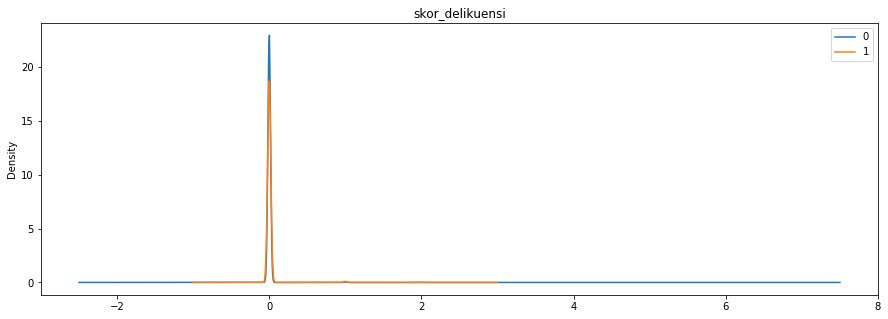

In [75]:
plt.figure(figsize=(15,5))
train.groupby('flag_kredit_macet').skor_delikuensi.plot.density(title='skor_delikuensi',legend=True)

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: jumlah_tahun_sejak_pembukaan_kredit, dtype: object

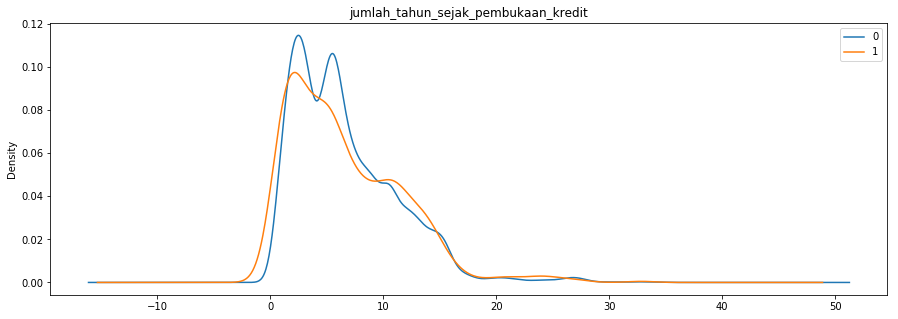

In [76]:
plt.figure(figsize=(15,5))
train.groupby('flag_kredit_macet').jumlah_tahun_sejak_pembukaan_kredit.plot.density(title='jumlah_tahun_sejak_pembukaan_kredit',legend=True)

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_pemakaian, dtype: object

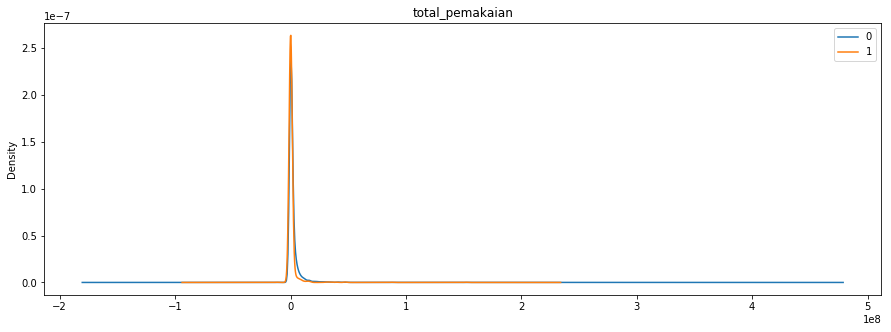

In [77]:
plt.figure(figsize=(15,5))
train.groupby('flag_kredit_macet').total_pemakaian.plot.density(title='total_pemakaian',legend=True)


In [38]:
# skor delikuensi
train.skor_delikuensi.value_counts()

0    15451
1       29
4        4
2        4
5        3
3        2
Name: skor_delikuensi, dtype: int64

## Cek Korelasi

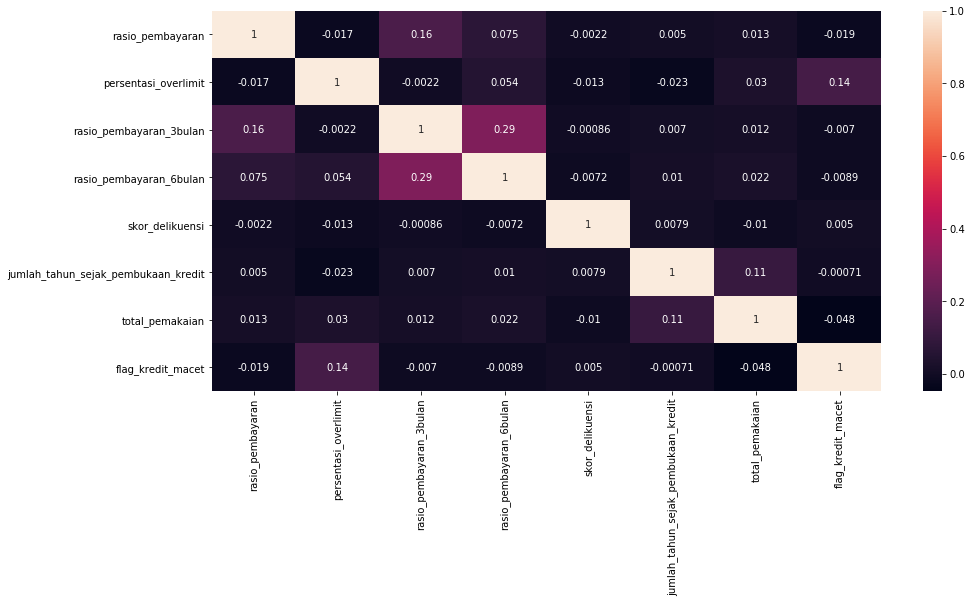

In [42]:
# hitung corelasi
# cor= train.corr(method='pearson')
# print(cor)

# plot the heatmap
plt.figure(figsize=(15,7))
sns.heatmap(cor, xticklabels=cor.columns,yticklabels=cor.columns,annot=True)

## X vs X

In [49]:
train.head()

,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,flag_kredit_macet
0,102.19,0.0,74.78,100.00,0,15.416667,94.0,0
1,0.00,0.0,0.00,0.00,0,0.750000,1012.0,0
2,100.00,0.0,100.00,100.91,0,10.750000,0.0,0
3,100.00,0.0,25.01,22.64,0,19.750000,2536660.0,0
4,95.99,0.0,97.49,99.84,0,1.666667,2666558.0,0


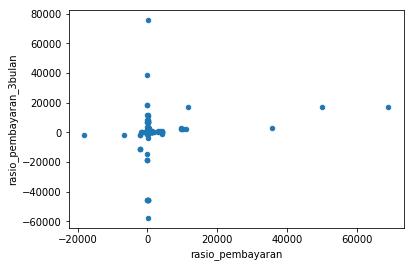

In [63]:
# sns.lmplot(x="sisa_tagihan_tidak_terbayar",y="rasio_pembayaran", data=train)
# plt.figure(figsize=(15,10))
train.plot(kind='scatter',x='rasio_pembayaran',y='rasio_pembayaran_3bulan')

# plt.subplot(222)
# train.plot(kind='scatter',x='rasio_pembayaran',y='rasio_pembayaran_6bulan')

# plt.tight_layout()
# plt.show()

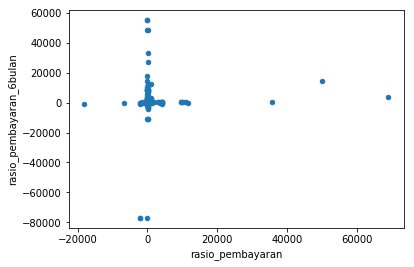

In [64]:
train.plot(kind='scatter',x='rasio_pembayaran',y='rasio_pembayaran_6bulan')

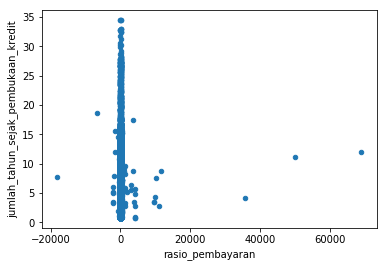

In [66]:
train.plot(kind='scatter',x='rasio_pembayaran',y='jumlah_tahun_sejak_pembukaan_kredit')

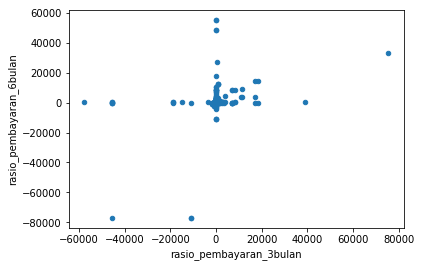

In [82]:
train.plot(kind='scatter',x='rasio_pembayaran_3bulan',y='rasio_pembayaran_6bulan')

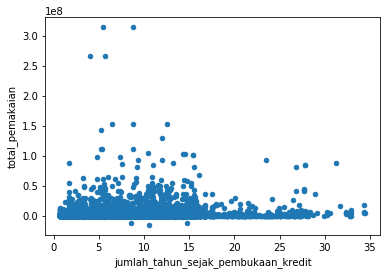

In [84]:
train.plot(kind='scatter',y='total_pemakaian',x='jumlah_tahun_sejak_pembukaan_kredit')